Hi Luci,

Here's a short notebook that shows how to use [astropy](http://docs.astropy.org/en/stable/) to load a data table containing very bright stars. Please take a look through this, and then add on to it in a few ways:

+ Plot a histogram of the V-band magnitudes of the stars, with a logarithmic scale for the y-axis. This is the same kind of plot as Figure 1 in the paper I gave you.

+ Plot the RA and Dec of these stars (like shown below), but scale the areas of the points so that they are proportional to the *flux* of each star. You'll need to use the function you're writing to convert from V-band magnitudes (the `Vmag` column in the table) to those fluxes. 

Please let me know what questions pop up!

Cheers,
Zach

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [11]:
import astropy.io.ascii
table = astropy.io.ascii.read('data/brightstars.txt')

In [12]:
print table

  RA     DEC      HD   Vmag
------ -------- ------ ----
1.2913  45.2292      3  6.7
1.2658  -0.5031      6 6.29
1.3337  -5.7075     28 4.61
 1.425  13.3961     87 5.51
1.5667  58.4367    123 5.96
1.5792  -49.075    142  5.7
1.6104  64.1961    144 5.59
1.6533  29.0214    166 6.13
1.7087 -23.1075    203 6.18
1.8258 -17.3864    256 6.19
   ...      ...    ...  ...
1.0567  62.2878 225180 5.88
1.0821 -16.5289 225197 5.78
1.0846 -29.2686 225200  6.4
1.1254 -10.5094 225212 4.94
 1.175  67.1667 225216 5.67
1.1529  42.0922 225218 6.01
1.1279 -72.8978 225233 7.31
1.2242  34.6597 225239 6.12
1.1721 -71.4369 225253 5.59
1.2333  26.6489 225276 6.25
1.2758  61.3142 225289  5.8
Length = 9096 rows


In [19]:
ra = table['RA'] 
dec = table['DEC']
hd = table ['HD']
vMag = table ['Vmag']

<IPython.core.display.Javascript object>


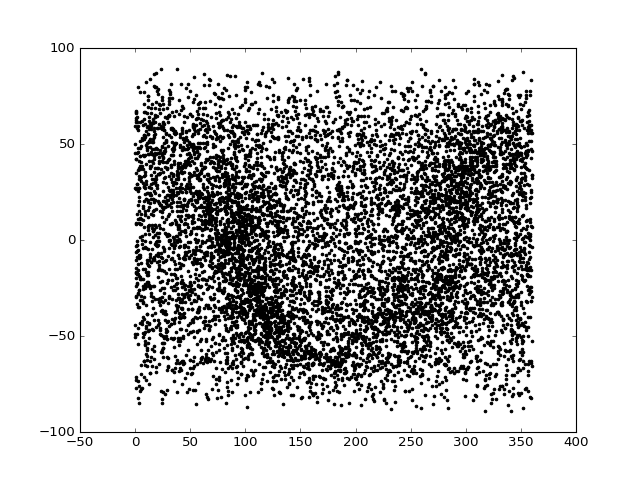

In [21]:
plt.scatter(ra, dec, color='black', s=5)

In [15]:
def MagnitudeToFlux(M):
    """
    This function uses the visual magnitude of a group of star
    to find out their energy flux (power/area).
    
    Parameters: 
    -------------------
    M = numpy array of the magnitudes of a group of stars
    
    Returns: 
    -------------------
    Fluxes = numpy array of the fluxes each of the stars emits in units Flx 
    (Need flux and magnitude of another star to convert in SI units Watts/m^2 )
     
    """
    
    # Use magnitudes formula, need to use the flux of a Star with magnitude 0 for the formula to work 

    Fluxes = (10**(-M/2.5))
    
    return Fluxes

In [20]:
FluxesOfBrightStars = MagnitudeToFlux(vMag)

<IPython.core.display.Javascript object>


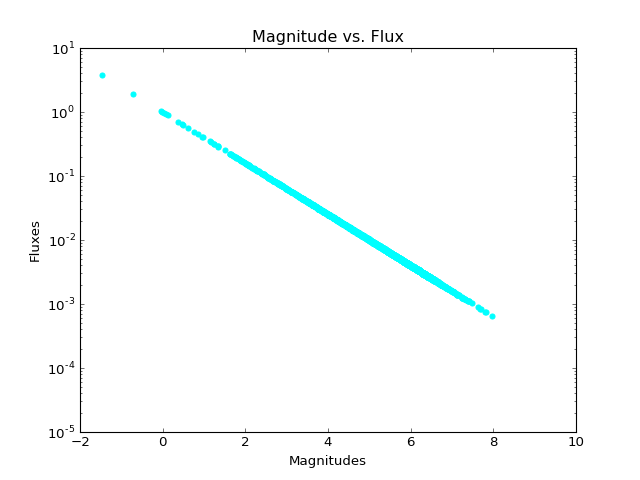

In [22]:
plt.scatter(vMag,FluxesOfBrightStars,color='aqua')
plt.yscale('log')
plt.ylim(0.00001,10)
plt.xlabel('Magnitudes')
plt.ylabel('Fluxes')
plt.title('Magnitude vs. Flux')

<IPython.core.display.Javascript object>


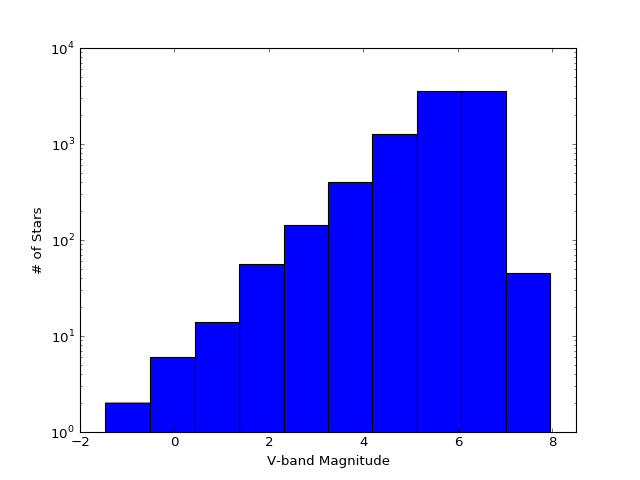

(-2, 8.5)

In [24]:
plt.hist(vMag)
plt.yscale('log')
plt.xlabel('V-band Magnitude')
plt.ylabel('# of Stars')
plt.xlim(-2,8.5)

<IPython.core.display.Javascript object>


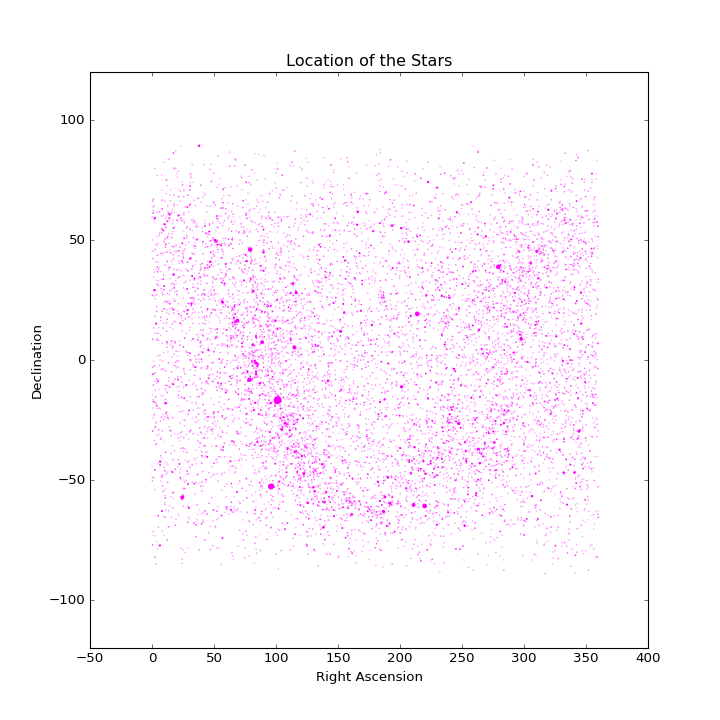

In [26]:

plt.figure(figsize=(9,9))
plt.scatter(ra,dec,s=FluxesOfBrightStars*10,color=('magenta'))


plt.ylim(-120,120)


plt.ylabel('Declination')
plt.xlabel('Right Ascension')
plt.title('Location of the Stars')